Veri Bilimi 101 Proje - Aylin √ñZKAN KELE≈û

Se√ßilen veri seti: Mental Health in Tech Survey

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Dataseti i√ßeri almak i√ßin:

from google.colab import files

uploaded = files.upload()

Saving survey.csv to survey (6).csv


In [ ]:
mhts=pd.read_csv("survey.csv")

In [ ]:
# Datasetin ilk 5 satƒ±rƒ±nƒ± getirerek, kolonlarƒ± g√∂r√ºnt√ºleyip, veriyi tanƒ±maya ba≈ülƒ±yorum.

mhts.head()

Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  

[5 rows x 27 columns]

In [ ]:
# Datasetin satƒ±r ve s√ºtun sayƒ±sƒ±:

mhts.shape

(1259, 27)

In [ ]:
# Dataset hakkƒ±nda genel bilgi i√ßin:

mhts.info() #state, self_employed, work_interfere, comments kolonlarƒ±nda eksik veriler bulunuyor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# Sayƒ±sal kolonlarƒ±n istatistikleri
mhts.describe()

Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11

/tmp/ipython-input-86-3574031172.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_ratio.values, y=missing_ratio.index, palette="Reds_r")


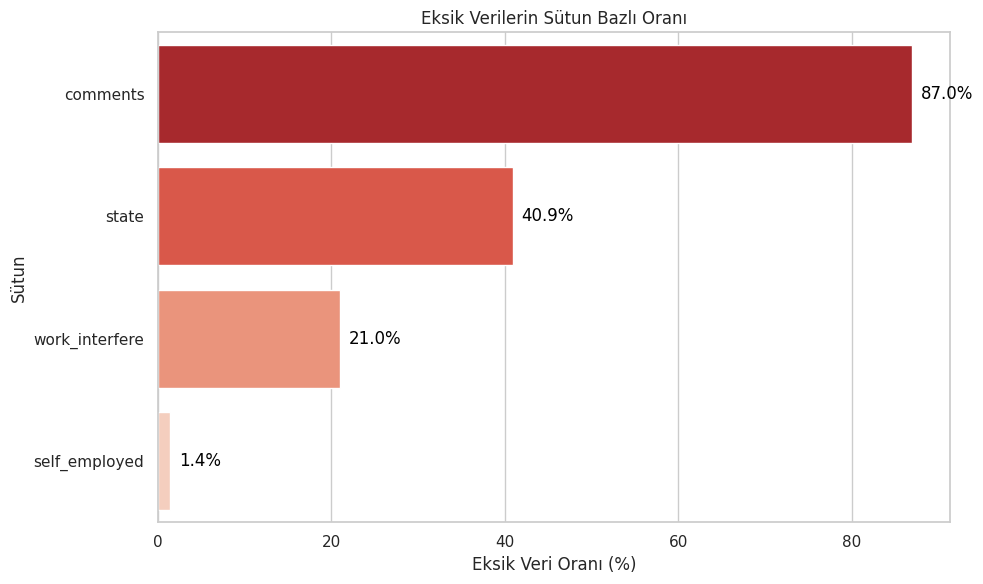

In [ ]:
# Eksik veri oranlarƒ±nƒ± hesaplama
missing_ratio = mhts.isnull().mean().sort_values(ascending=False) * 100
missing_ratio = missing_ratio[missing_ratio > 0]

# Eksik veri oranlarƒ±nƒ± g√∂rselle≈ütirme
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=missing_ratio.values, y=missing_ratio.index, palette="Reds_r")
for i, v in enumerate(missing_ratio.values):
    ax.text(v + 1, i, f"{v:.1f}%", color='black', va='center')

plt.xlabel("Eksik Veri Oranƒ± (%)")
plt.ylabel("S√ºtun")
plt.title("Eksik Verilerin S√ºtun Bazlƒ± Oranƒ±")
plt.tight_layout()
plt.show()

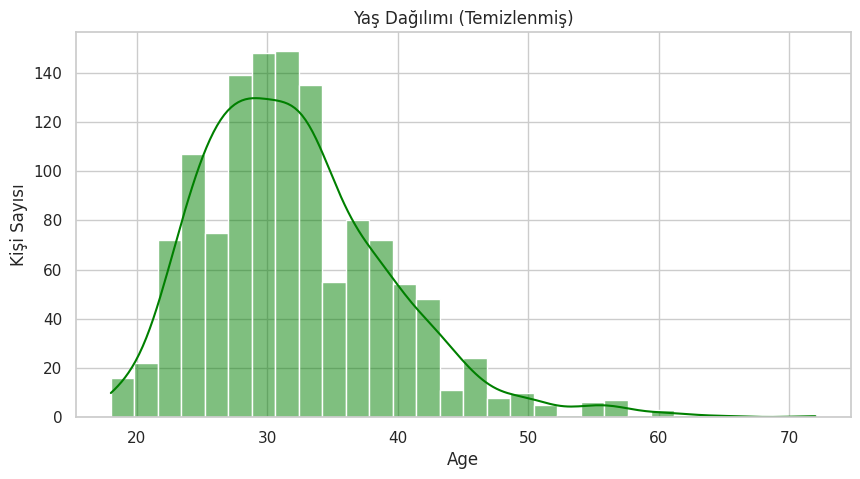

In [ ]:
# Temizlenmi≈ü ya≈ü daƒüƒ±lƒ±mƒ±nƒ± g√∂rselle≈ütirme
plt.figure(figsize=(10, 5))
sns.histplot(mhts_cleaned["Age"], bins=30, kde=True, color='green')
plt.title("Ya≈ü Daƒüƒ±lƒ±mƒ± (Temizlenmi≈ü)")
plt.xlabel("Age")
plt.ylabel("Ki≈üi Sayƒ±sƒ±")
plt.show()


In [ ]:
# T√ºm gender deƒüerlerini k√º√ß√ºk harfe √ßevirip bo≈üluklarƒ± temizleme
mhts["Gender_cleaned"] = mhts["Gender"].str.lower().str.strip()

# Benzer ifadeleri ortak gruplara ayƒ±rma
def simplify_gender(g):
    if "male" in g or g in ["m", "man"]:
        return "Male"
    elif "female" in g or g in ["f", "woman"]:
        return "Female"
    else:
        return "Other"

In [ ]:
mhts["Gender_grouped"] = mhts["Gender_cleaned"].apply(simplify_gender)

/tmp/ipython-input-90-159272380.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


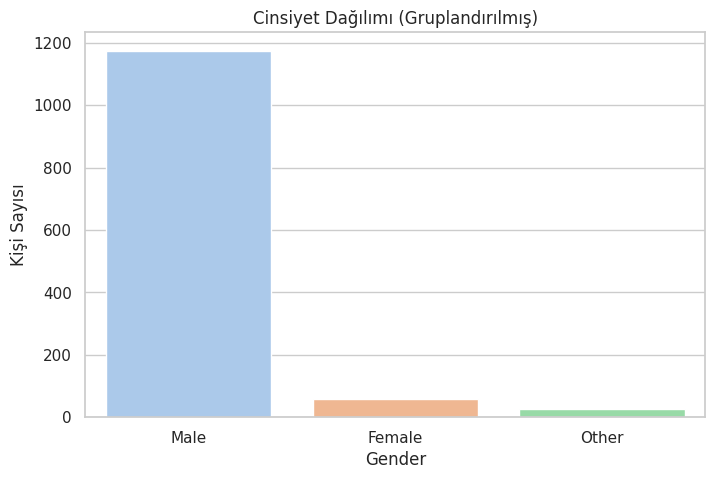

In [ ]:
#Cinsiyet daƒüƒ±lƒ±mƒ± g√∂rselle≈ütirme

plt.figure(figsize=(8, 5))
sns.countplot(
    data=mhts,
    x="Gender_grouped",
    order=["Male", "Female", "Other"],
    palette="pastel"
)
plt.title("Cinsiyet Daƒüƒ±lƒ±mƒ± (Gruplandƒ±rƒ±lmƒ±≈ü)")
plt.xlabel("Gender")
plt.ylabel("Ki≈üi Sayƒ±sƒ±")
plt.show()


In [ ]:
# Gereksiz ve √ßok eksik s√ºtunlarƒ± √ßƒ±karma
mhts.drop(columns=["comments", "state"], inplace=True)

In [ ]:
# Az eksik ama anlamlƒ± s√ºtunlarƒ± doldurma
mhts["self_employed"].fillna("No", inplace=True)
mhts["work_interfere"].fillna("Don't know", inplace=True)

/tmp/ipython-input-92-4251525968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mhts["self_employed"].fillna("No", inplace=True)
/tmp/ipython-input-92-4251525968.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
mhts.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Gender_cleaned               0
Gender_grouped               0
dtype: int64

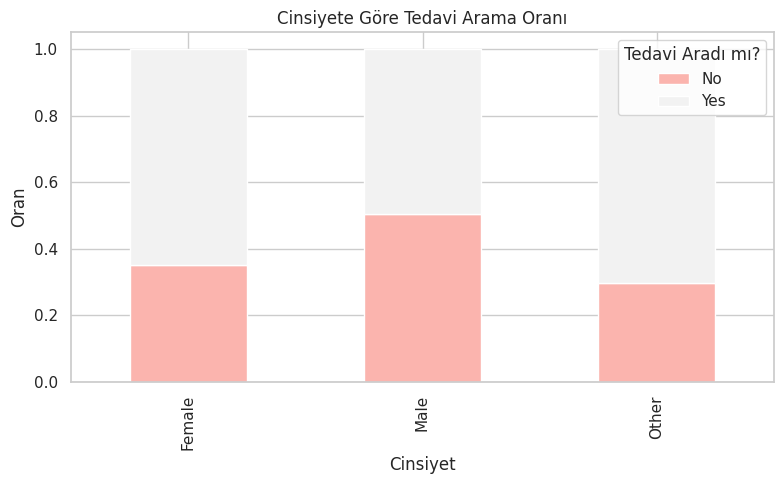

In [ ]:
# Cinsiyete g√∂re tedavi arama oranlarƒ±nƒ± hesaplama ve grafik
treatment_by_gender = mhts.groupby("Gender_grouped")["treatment"].value_counts(normalize=True).unstack()

treatment_by_gender.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Pastel1")

plt.title("Cinsiyete G√∂re Tedavi Arama Oranƒ±")
plt.xlabel("Cinsiyet")
plt.ylabel("Oran")
plt.legend(title="Tedavi Aradƒ± mƒ±?")
plt.tight_layout()
plt.show()

# Erkeklerin tedavi arama oranƒ± diƒüer cinsiyetlere g√∂re daha d√º≈ü√ºkt√ºr.

/tmp/ipython-input-98-2871485466.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  treatment_by_age = mhts.groupby("age_group")["treatment"].value_counts(normalize=True).unstack()


<Axes: xlabel='age_group'>

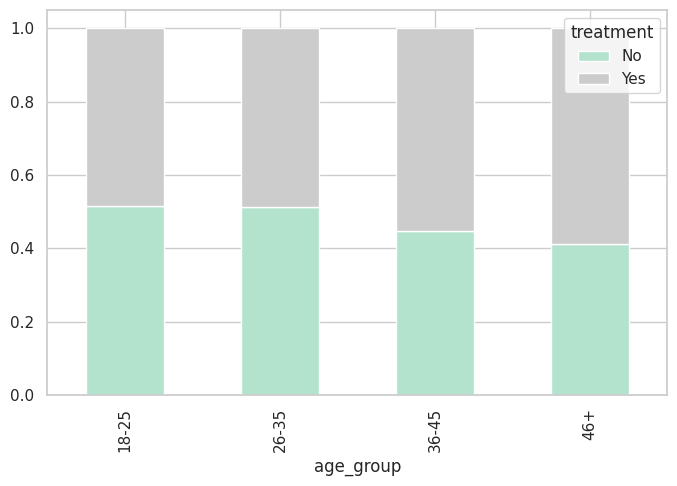

In [ ]:
#Ya≈ü gruplarƒ±na g√∂re tedavi arama oranlarƒ±

# Ya≈ülarƒ±n gruplara ayrƒ±lmasƒ±
bins = [17, 25, 35, 45, 100]
labels = ['18-25', '26-35', '36-45', '46+']
mhts["age_group"] = pd.cut(mhts["Age"], bins=bins, labels=labels)

# Gruplara g√∂re tedavi oranlarƒ±nƒ±n hesabƒ±
treatment_by_age = mhts.groupby("age_group")["treatment"].value_counts(normalize=True).unstack()
# G√∂rselle≈ütirme
treatment_by_age.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Pastel2")

# Ya≈ü gruplarƒ±na g√∂re tedavi arama oranlarƒ± dengelidir.

<Axes: xlabel='family_history'>

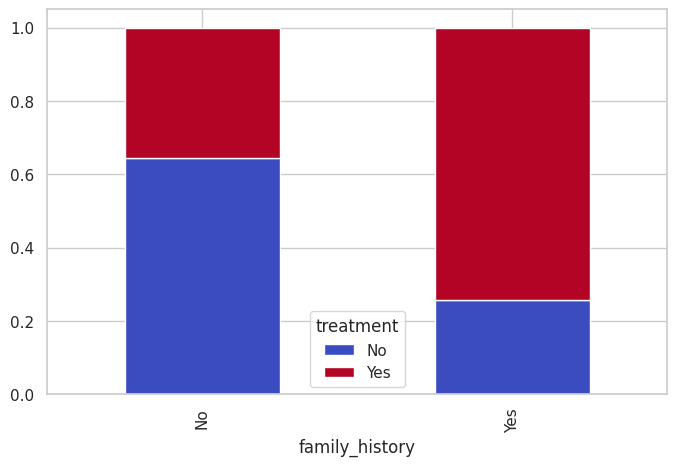

In [ ]:
# Aile ruh saƒülƒ±ƒüƒ± ge√ßmi≈üine g√∂re tedavi arama oranlarƒ± g√∂rselle≈ütirme
treatment_by_family = mhts.groupby("family_history")["treatment"].value_counts(normalize=True).unstack()
treatment_by_family.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")

# Ailesinde ruh saƒülƒ±ƒüƒ± ge√ßmi≈üi olanlarƒ±n tedavi arama oranƒ± daha y√ºksek √ßƒ±kmƒ±≈ütƒ±r.

Modelleme

In [ ]:
y = mhts["treatment"]
y = y.map({"Yes": 1, "No": 0})

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1. Kullanƒ±lacak s√ºtunlar
selected_columns = [
    "Age", "Gender_grouped", "self_employed", "family_history", "work_interfere",
    "no_employees", "remote_work", "benefits", "care_options", "wellness_program",
    "seek_help", "anonymity", "leave", "mental_health_consequence", "phys_health_consequence"
]

# 2. √ñzellikler ve hedef deƒüi≈ükeni ayƒ±rma
X = mhts[selected_columns].copy()         # √ñzellikler
y = mhts["treatment"].map({"Yes": 1, "No": 0})  # Hedef (binary)

# 3. Kategorik s√ºtunlarƒ± tespit etme
categorical_columns = X.select_dtypes(include="object").columns

# 4. Kategorik s√ºtunlarƒ± sayƒ±ya √ßevirme (Label Encoding)
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # stringe √ßevirerek hatalarƒ± √∂nleme
    label_encoders[col] = le  # gerektiƒüinde geri √ßevirmek i√ßin saklama

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Veriyi eƒüitim ve test setine ayƒ±rma
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # %20 test
    random_state=42,       # tekrar edilebilir sonu√ßlar i√ßin
    stratify=y)             # sƒ±nƒ±f oranlarƒ±nƒ± koruma

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (1007, 15)
X_test : (252, 15)
y_train: (1007,)
y_test : (252,)


In [ ]:
# Verinin %80‚Äôi eƒüitim, %20‚Äôsi test i√ßin ayrƒ±ldƒ±.

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Test verisiyle tahmin yapma
y_pred = model.predict(X_test)

# Confusion matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)

# Sƒ±nƒ±flandƒ±rma raporunu √ºretme
report = classification_report(
    y_test, y_pred,
    target_names=["Tedavi Aramadƒ±", "Tedavi Aradƒ±"])

print("üîπ Confusion Matrix:\n", conf_matrix)
print("\nüîπ Sƒ±nƒ±flandƒ±rma Raporu:\n", report)

üîπ Confusion Matrix:
 [[ 94  30]
 [ 23 105]]

üîπ Sƒ±nƒ±flandƒ±rma Raporu:
                 precision    recall  f1-score   support

Tedavi Aramadƒ±       0.80      0.76      0.78       124
  Tedavi Aradƒ±       0.78      0.82      0.80       128

      accuracy                           0.79       252
     macro avg       0.79      0.79      0.79       252
  weighted avg       0.79      0.79      0.79       252



/tmp/ipython-input-117-3904069702.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


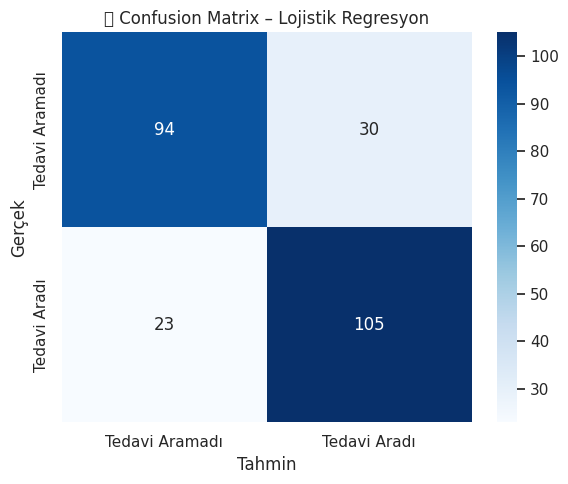

In [ ]:
# Confusion Matrix g√∂rselle≈ütirme
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap="Blues",
    xticklabels=["Tedavi Aramadƒ±", "Tedavi Aradƒ±"],
    yticklabels=["Tedavi Aramadƒ±", "Tedavi Aradƒ±"])

plt.xlabel("Tahmin")
plt.ylabel("Ger√ßek")
plt.title("üìä Confusion Matrix ‚Äì Lojistik Regresyon")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

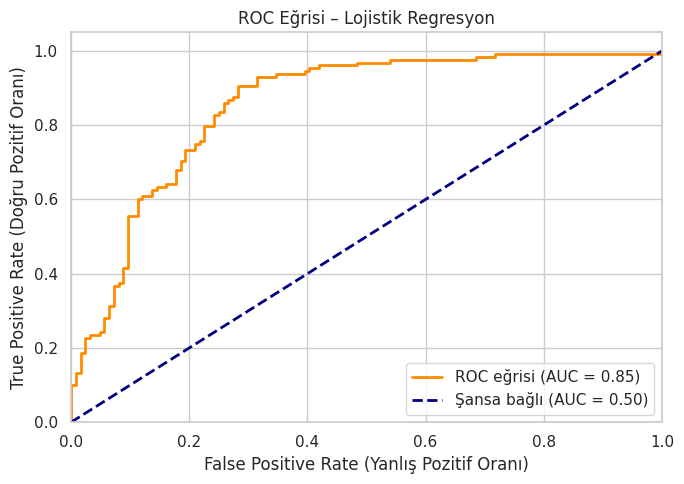

In [ ]:
# Modelin pozitif sƒ±nƒ±f i√ßin tahmin olasƒ±lƒ±klarƒ±nƒ± alma
y_prob = model.predict_proba(X_test)[:, 1]

# ROC eƒürisi i√ßin gerekli fpr (False Positive Rate), tpr (True Positive Rate) ve threshold'larƒ± hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC (Area Under Curve) skorunu hesaplama
roc_auc = roc_auc_score(y_test, y_prob)

# ROC eƒürisini √ßizme
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eƒürisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='≈ûansa baƒülƒ± (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Yanlƒ±≈ü Pozitif Oranƒ±)')
plt.ylabel('True Positive Rate (Doƒüru Pozitif Oranƒ±)')
plt.title('ROC Eƒürisi ‚Äì Lojistik Regresyon')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# AUC Skoru
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC: {:.2f}".format(roc_auc))

AUC: 0.85


/tmp/ipython-input-122-565416069.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-122-565416069.py:26: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


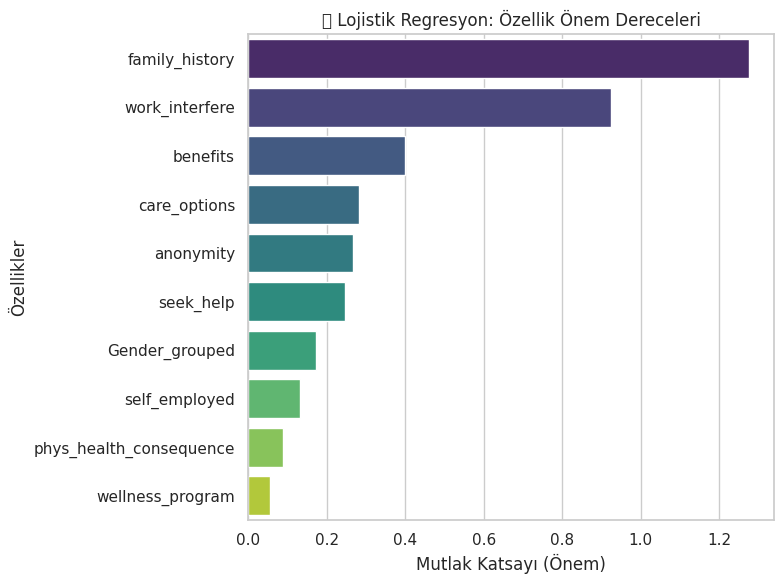

In [ ]:
# √ñzellik adlarƒ±nƒ± alma
feature_names = X.columns

# Modelin katsayƒ±larƒ±nƒ± alma (her √∂zelliƒüin modeldeki etkisi)
coefficients = model.coef_[0]  # .coef_ her sƒ±nƒ±f i√ßin katsayƒ±lar d√∂ner ‚Üí [0] ile 1. sƒ±nƒ±fƒ± alƒ±yoruz

# DataFrame olu≈üturma: hem katsayƒ±larƒ± hem mutlak deƒüerlerini g√∂sterme
importance_df = pd.DataFrame({
    "√ñzellik": feature_names,
    "Katsayƒ±": coefficients,
    "√ñnemi (|deƒüer|)": np.abs(coefficients)})

# √ñnem sƒ±rasƒ±na g√∂re sƒ±ralama
importance_df = importance_df.sort_values(by="√ñnemi (|deƒüer|)", ascending=False)

# En √∂nemli 10 √∂zellik
plt.figure(figsize=(8, 6))
sns.barplot(
    x="√ñnemi (|deƒüer|)",
    y="√ñzellik",
    data=importance_df.head(10),
    palette="viridis")
plt.title("üîç Lojistik Regresyon: √ñzellik √ñnem Dereceleri")
plt.xlabel("Mutlak Katsayƒ± (√ñnem)")
plt.ylabel("√ñzellikler")
plt.tight_layout()
plt.show()
